In [1]:
import os, sys
sys.path.insert(0, os.path.abspath(os.path.join("..", "..")))

# Reload the naive predictions

Shows how to make use of the data produced from the `scripted` script `naive.py`.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import open_cp.scripted
import open_cp.scripted.analysis as analysis

In [3]:
loaded = open_cp.scripted.Loader("naive_preds.pic.xz")

In [4]:
loaded.timed_points.time_range

(numpy.datetime64('2016-01-02T13:00:00.000'),
 numpy.datetime64('2017-08-09T09:00:00.000'))

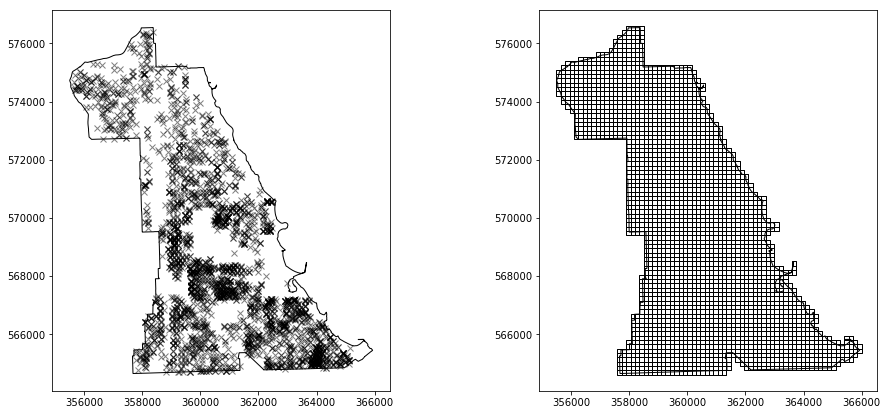

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(16,7))
analysis.plot_data_scatter(loaded, axes[0])
analysis.plot_data_grid(loaded, axes[1])

In [6]:
next(iter(loaded))

LoadedPrediction(predictor_class=NaiveProvider (CountingGridKernel), time=datetime.datetime(2016, 10, 1, 0, 0), prediction=GridPredictionArray(offset=(355500,564600), size=150x150, risk intensity size=70x80))

In [7]:
times = [x[1] for x in loaded]
preds = [x[2] for x in loaded]

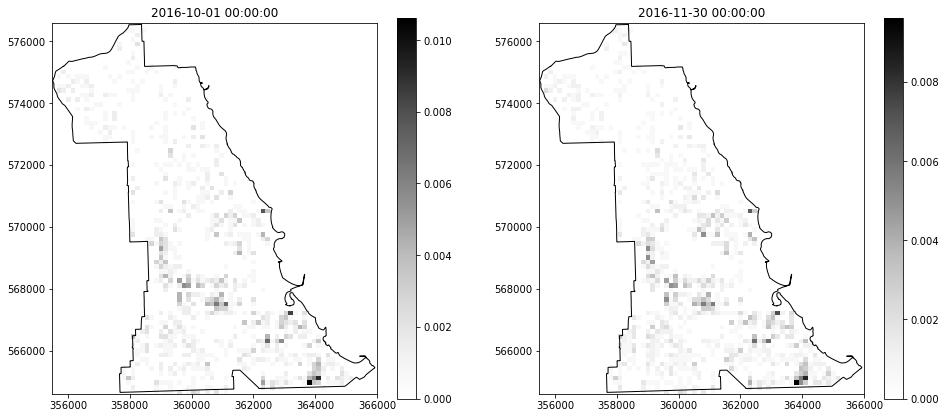

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(16,7))
for ax, i in zip(axes, [0, 60]):
    analysis.plot_prediction(loaded, preds[i], ax)
    ax.set_title(times[i])

# Manually redo the predictions and scoring

In [9]:
import datetime
import open_cp.naive
import numpy as np
import pandas as pd
import open_cp.evaluation

In [10]:
start = datetime.datetime(2016, 10, 1)
our_preds = []
while start < datetime.datetime(2017, 1, 1):
    predictor = open_cp.naive.CountingGridKernel(loaded.grid.xsize, region=loaded.grid.region())
    mask = loaded.timed_points.timestamps < start
    predictor.data = loaded.timed_points[mask]
    pred = predictor.predict()

    pred.mask_with(loaded.grid)
    pred = pred.renormalise()
    
    our_preds.append(pred)
    start += datetime.timedelta(days=1)

In [11]:
for i in range(len(our_preds)):
    np.testing.assert_allclose(our_preds[i].intensity_matrix, preds[i].intensity_matrix)

### Check the scoring

In [12]:
frame = pd.read_csv("naive.csv")
frame.head()

,Predictor,Start time,End time,1%,2%,3%,4%,5%,6%,7%,...,91%,92%,93%,94%,95%,96%,97%,98%,99%,100%
0,NaiveProvider (CountingGridKernel),2016-10-01 00:00:00,2016-10-02 00:00:00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,NaiveProvider (CountingGridKernel),2016-10-02 00:00:00,2016-10-03 00:00:00,0.0,0.00,0.500000,0.500000,0.500000,0.500000,0.500000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,NaiveProvider (CountingGridKernel),2016-10-03 00:00:00,2016-10-04 00:00:00,0.0,0.25,0.250000,0.250000,0.250000,0.250000,0.250000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,NaiveProvider (CountingGridKernel),2016-10-04 00:00:00,2016-10-05 00:00:00,0.0,0.00,0.142857,0.142857,0.142857,0.142857,0.142857,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,NaiveProvider (CountingGridKernel),2016-10-05 00:00:00,2016-10-06 00:00:00,0.2,0.20,0.500000,0.500000,0.600000,0.600000,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
frame.tail()

,Predictor,Start time,End time,1%,2%,3%,4%,5%,6%,7%,...,91%,92%,93%,94%,95%,96%,97%,98%,99%,100%
179,NaiveProvider (ScipyKDE),2016-12-27 00:00:00,2016-12-28 00:00:00,0.0,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
180,NaiveProvider (ScipyKDE),2016-12-28 00:00:00,2016-12-29 00:00:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
181,NaiveProvider (ScipyKDE),2016-12-29 00:00:00,2016-12-30 00:00:00,0.0,0.285714,0.285714,0.285714,0.285714,0.285714,0.285714,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
182,NaiveProvider (ScipyKDE),2016-12-30 00:00:00,2016-12-31 00:00:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
183,NaiveProvider (ScipyKDE),2016-12-31 00:00:00,2017-01-01 00:00:00,0.0,0.000000,0.142857,0.142857,0.142857,0.142857,0.142857,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [14]:
coverages = list(range(1,101))

start = datetime.datetime(2016, 10, 1)
rows = []
for pred in our_preds:
    end = start + datetime.timedelta(days=1)
    mask = (loaded.timed_points.timestamps >= start) & (loaded.timed_points.timestamps < end)
    rows.append(open_cp.evaluation.hit_rates(pred, loaded.timed_points[mask], coverages))
    start = end

In [15]:
for i in range(len(rows)):
    np.testing.assert_allclose(frame.ix[i][3:].values.astype(np.float), list(rows[i].values()))

# Some plots

## Average hit rate

And [standard error](https://en.wikipedia.org/wiki/Standard_error)

In [16]:
def plot_mean_hitrate(ax, frame, xrange):
    coverages = list(range(1,101))

    data= {}
    for pred_type in frame.Predictor.unique():
        data[pred_type] = {}
        f = frame[frame.Predictor == pred_type].describe()
        for cov in coverages:
            r = f["{}%".format(cov)]
            data[pred_type][cov] = r["mean"], (r["std"] / np.sqrt(r["count"]))
            
    for pred_type in data:
        series = data[pred_type]
        x = np.sort(list(xrange))
        y = np.asarray([series[xx][0] for xx in x])
        ax.plot(x, y, label=pred_type)
        dy = np.asarray([series[xx][1] for xx in x])
        ax.fill_between(x, y-dy, y+dy, alpha=0.5)
    ax.legend()

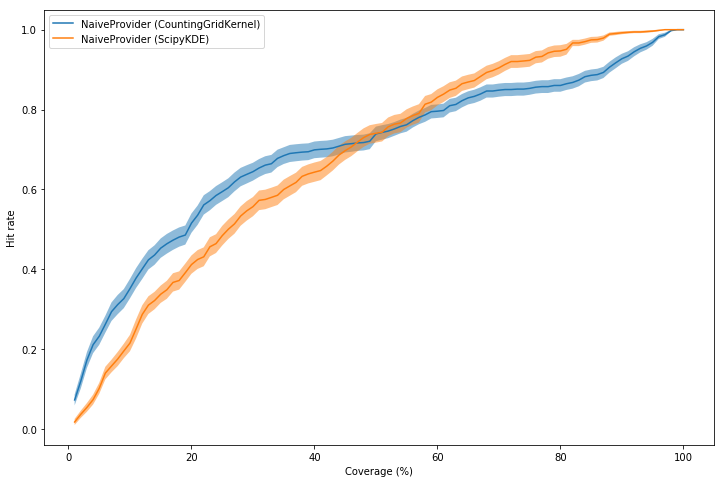

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
plot_mean_hitrate(ax, frame, range(1,101))
ax.set(xlabel="Coverage (%)", ylabel="Hit rate")
None

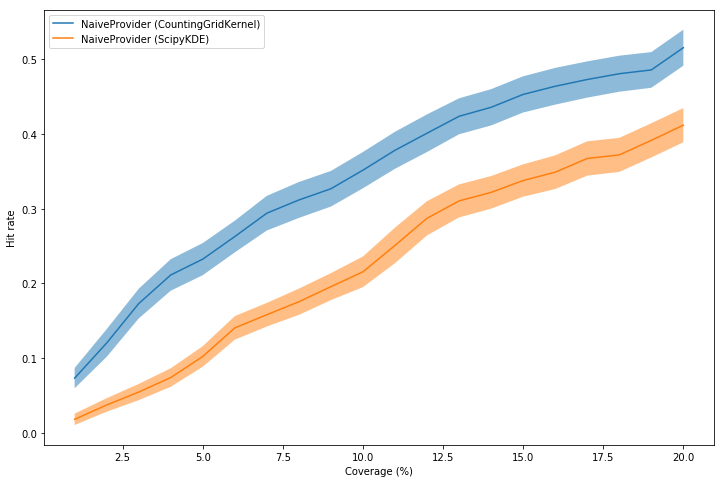

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
plot_mean_hitrate(ax, frame, range(1,21))
ax.set(xlabel="Coverage (%)", ylabel="Hit rate")
None

## Fit binomial model instead

Use a [beta prior](https://en.wikipedia.org/wiki/Conjugate_prior)

In [48]:
betas = analysis.hit_counts_to_beta("naive_counts.csv")

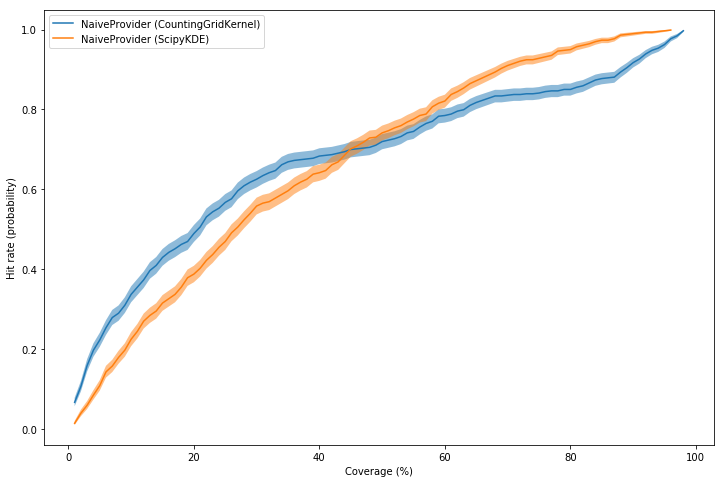

In [65]:
fig, ax = plt.subplots(figsize=(12,8))
analysis.plot_betas(betas, ax)

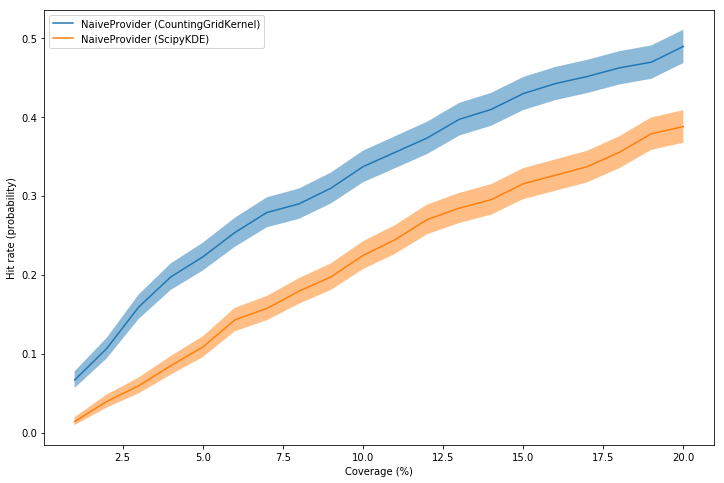

In [66]:
fig, ax = plt.subplots(figsize=(12,8))
analysis.plot_betas(betas, ax, range(1,21))

## What does this difference actually mean??

Suppose we pick 5% coverage. There is a big gap between the curves there.

In [79]:
tps = loaded.timed_points.bin_timestamps(datetime.datetime(2016,1,1), datetime.timedelta(days=1))
import collections, statistics
c = collections.Counter(tps.timestamps)
statistics.mean(c.values())

5.298275862068966

So we have about 5 crime events a day, on average.

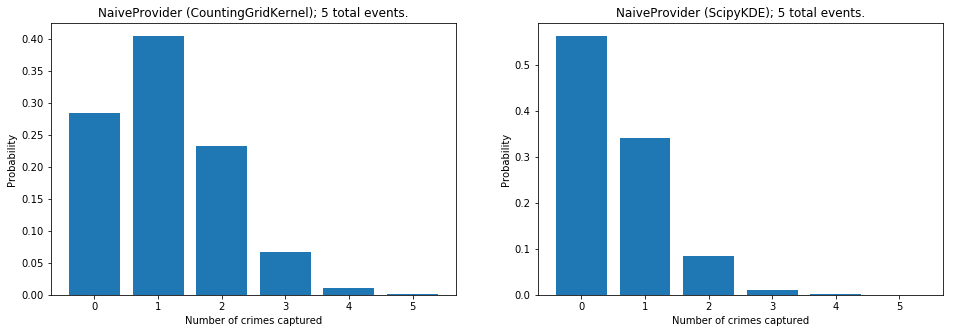

In [80]:
import scipy.special

def BetaBinom(alpha,beta,n,k):
    """http://www.channelgrubb.com/blog/2015/2/27/beta-binomial-in-python"""
    part_1 = scipy.special.comb(n,k)
    part_2 = scipy.special.betaln(k+alpha,n-k+beta)
    part_3 = scipy.special.betaln(alpha,beta)
    
    result = (np.log(part_1) + part_2)- part_3
    
    return np.exp(result)

fig, axes = plt.subplots(ncols=len(betas), figsize=(16,5))

n = 5
for ax, key in zip(axes, betas):
    beta = betas[key][5]
    p = [BetaBinom(*beta.args,n,k) for k in range(0,n+1)]
    ax.bar(np.arange(n+1), p)
    ax.set(xlabel="Number of crimes captured", ylabel="Probability")
    ax.set_title("{}; {} total events.".format(key, n))

These plots show the probability of capturing $x$ events out of the 5 total events.  This sort of puts the difference in perspective-- it's pretty small!